## Network Flow

In [107]:
import numpy as np

$m = |N|, n = |A|$

In [108]:
class Edge:
    def __init__(self, i: int, j: int, cost: float) -> None:
        self.i = i
        self.j = j
        self.cost = cost

    def __str__(self) -> str:
        return f"{self.i} → {self.j}, c={self.cost}"


In [109]:
def build_matrix(number_node: int, edges: list[Edge]):
    # Output: matrix mx(n+1) A, with component i=1, j=-1, and last component 1
    number_edge = len(edges)
    A = np.zeros((number_node, number_edge))
    for k in range(number_edge - 1):
        A[edges[k].i - 1, k] = 1
        A[edges[k].j - 1, k] = -1
    A[edges[-1].i - 1, -1] = 1
    return A


#### Ejemplo 1


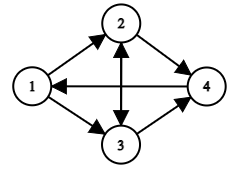

In [110]:
edges: list[Edge] = [Edge(1, 2, 1), Edge(1, 3, 1), Edge(2, 3, 5), Edge(2, 4, 5), Edge(3, 2, 1), Edge(3, 4, 5), Edge(4, 1, 1), Edge(4, np.Inf, 0)]  # (4, inf)
number_node = 4
A = build_matrix(number_node, edges)
A


array([[ 1.,  1.,  0.,  0.,  0.,  0., -1.,  0.],
       [-1.,  0.,  1.,  1., -1.,  0.,  0.,  0.],
       [ 0., -1., -1.,  0.,  1.,  1.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0., -1.,  1.,  1.]])

In [111]:
basic_var = [1, 2, 5, -1]
A[:, basic_var]

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [-1., -1.,  1.,  0.],
       [ 0.,  0., -1.,  1.]])

#### Ejemplo 2

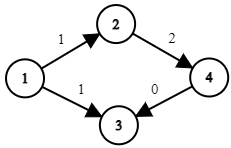

In [112]:
edges = [Edge(1, 2, 1), Edge(1, 3, 1), Edge(2, 4, 2), Edge(4, 3, 0), Edge(4, np.Inf, 0)]  # (4, inf)
number_node = 4
A = build_matrix(number_node, edges)
A


array([[ 1.,  1.,  0.,  0.,  0.],
       [-1.,  0.,  1.,  0.,  0.],
       [ 0., -1.,  0., -1.,  0.],
       [ 0.,  0., -1.,  1.,  1.]])

#### Ejemplo 3


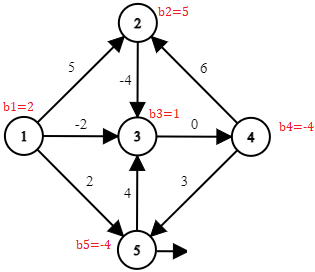

In [113]:
number_nodes = 5
edges: list[Edge] = [Edge(1, 2, 5), Edge(1, 3, -2), Edge(1, 5, 2), Edge(2, 3, -4), Edge(3, 4, 0), Edge(4, 2, 6), Edge(4, 5, 3), Edge(5, 3, 4), Edge(5, np.Inf, 0)]

A = build_matrix(number_nodes, edges)
b = np.array([2, 5, 1, -4, -4.])  # sum(b) = 0
c = np.array(list(map(lambda e: e.cost, edges)))

basic_var = [2, 3, 4, 6, 8]
B = A[:, basic_var]

print("Matriz A\n", A)
print(f"Variables básicas = {basic_var}\nMatriz básica\n{B}")
print(f"Solución básica = {np.linalg.inv(B)@b}")


Matriz A
 [[ 1.  1.  1.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  1.  0. -1.  0.  0.  0.]
 [ 0. -1.  0. -1.  1.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. -1.  1.  1.  0.  0.]
 [ 0.  0. -1.  0.  0.  0. -1.  1.  1.]]
Variables básicas = [2, 3, 4, 6, 8]
Matriz básica
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0. -1.  1.  0.  0.]
 [ 0.  0. -1.  1.  0.]
 [-1.  0.  0. -1.  1.]]
Solución básica = [2. 5. 6. 2. 0.]


Dual
\begin{align*}
\mathbf{c}_{NI}^T - \mathbf{c}_{BI}^TB^{-1}N &= z_{ij} - c_{ij}\\
&=w a_{ij} - c_{ij}
\end{align*}
$$\mathbf w  = \mathbf{c}_{BI}^TB^{-1}$$

In [114]:
w = c[basic_var] @ np.linalg.inv(B)
# en el dibujo de flujo en redes, situo la wi en la cola del enlace aij
print(f"Sistema dual\nw = {w}")


Sistema dual
w = [ 2. -1.  3.  3.  0.]


Para que sea óptimal todos los enlaces deben ser negativos 

In [115]:
var = set(range(len(edges)))
non_basic_var = list(var - set(basic_var))

In [116]:
# aún no es negativo, lo cambiamos
w @ A[:, non_basic_var] - c[non_basic_var]


array([-2.,  1., -2., -7.])

1 no es negativo, es nuestra nueva variable básica. Hallando el flujo en un circuito, sacamos aquella cuyo flujo es negativo. Por lo que nuestras nueva variables básicas son:

In [117]:
non_basic_var

[0, 1, 5, 7]

In [121]:
basic_var = [1, 3, 4, 6, 8]
B = A[:, basic_var]

print(f"Variables básicas = {basic_var}\nMatriz básica\n{B}")
print(f"Solución básica = {np.linalg.inv(B)@b}")

Variables básicas = [1, 3, 4, 6, 8]
Matriz básica
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [-1. -1.  1.  0.  0.]
 [ 0.  0. -1.  1.  0.]
 [ 0.  0.  0. -1.  1.]]
Solución básica = [2. 5. 8. 4. 0.]


In [125]:
non_basic_var = list(var - set(basic_var))
w = c[basic_var] @ np.linalg.inv(B)
# todos los costos son negativos, se halló el óptimo y los enlaces asociados
w @ A[:, non_basic_var] - c[non_basic_var] 


array([-3., -1., -2., -7.])

#### Ejemplo 4


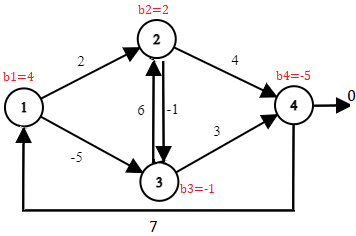

In [133]:
number_nodes = 4
edges: list[Edge] = [Edge(1, 2, 2),
                     Edge(1, 3, -5),
                     Edge(2, 3, -1),
                     Edge(2, 4, 4),
                     Edge(3, 2, 6),
                     Edge(3, 4, 3),
                     Edge(4, 1, 7),
                     Edge(4, np.Inf, 0)]

A = build_matrix(number_nodes, edges)
b = np.array([4, 2, -1, -5])  # sum(b) = 0
c = np.array(list(map(lambda e: e.cost, edges)))
var = set(range(len(edges)))

basic_var = [0, 2, 3, 7]

B = A[:, basic_var]

w = c[basic_var] @ np.linalg.inv(B)
# en el dibujo de flujo en redes, situo la wi en la cola del enlace aij
print(f"Sistema dual\nw = {w}")
non_basic_var = list(var - set(basic_var))
w = c[basic_var] @ np.linalg.inv(B)
# todos los costos son negativos, se halló el óptimo y los enlaces asociados
print("x_NI =", non_basic_var)
non_basic_cost = w @ A[:, non_basic_var] - c[non_basic_var]
print(non_basic_cost)
# c_NI- C_BI B^-1N costos no básicos no son todos negativos


Sistema dual
w = [6. 4. 5. 0.]
x_NI = [1, 4, 5, 6]
[  6.  -5.   2. -13.]


In [135]:
# Puedo elegit cualquier arista positiva pero elijo la arista mas positiva, segunda arista
# Calculando el flujo circular a favor de la nueva arista sale dos que estan en contra aplico el test de minimo ratio
basic_var = [0, 1, 3, 7]
B = A[:, basic_var]

w = c[basic_var] @ np.linalg.inv(B)
# en el dibujo de flujo en redes, situo la wi en la cola del enlace aij
print(f"Sistema dual\nw = {w}")
non_basic_var = list(var - set(basic_var))
w = c[basic_var] @ np.linalg.inv(B)
# todos los costos son negativos, se halló el óptimo y los enlaces asociados
print("x_NI =", non_basic_var)
non_basic_cost = w @ A[:, non_basic_var] - c[non_basic_var]
print(non_basic_cost)
# c_NI- C_BI B^-1N costos no básicos no son todos negativos

Sistema dual
w = [ 6.  4. 11.  0.]
x_NI = [2, 4, 5, 6]
[ -6.   1.   8. -13.]


In [136]:
# entra la arista 5 sale la arista 0
basic_var = [5, 1, 3, 7]
B = A[:, basic_var]

w = c[basic_var] @ np.linalg.inv(B)
# en el dibujo de flujo en redes, situo la wi en la cola del enlace aij
print(f"Sistema dual\nw = {w}")
non_basic_var = list(var - set(basic_var))
w = c[basic_var] @ np.linalg.inv(B)
# todos los costos son negativos, se halló el óptimo y los enlaces asociados
print("x_NI =", non_basic_var)
non_basic_cost = w @ A[:, non_basic_var] - c[non_basic_var]
print(non_basic_cost)
# c_NI- C_BI B^-1N costos no básicos no son todos negativos
# FALTA TERMINAR! y OPTIMIZAR!!!

Sistema dual
w = [-2.  4.  3.  0.]
x_NI = [0, 2, 4, 6]
[-8.  2. -7. -5.]
